<a href="https://colab.research.google.com/github/aravindrepository/Covid-19-data-analysis/blob/main/Covid_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Covid-19 Data analysis using small sized dataset

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('covid.csv')

In [16]:
Data_copy=data.copy()

###Dataset details

In [17]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [18]:
data.tail(n=3)

,Date,State,Region,Confirmed,Deaths,Recovered
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [19]:
data.shape

(321, 6)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


###Data exploration

null values in dataset

In [23]:
data.count()

,0
Date,321
State,140
Region,321
Confirmed,321
Deaths,321
Recovered,321


In [21]:
data.isnull().sum()

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [22]:
data.isnull().mean()

,0
Date,0.000000
State,0.563863
Region,0.000000
Confirmed,0.000000
Deaths,0.000000
Recovered,0.000000


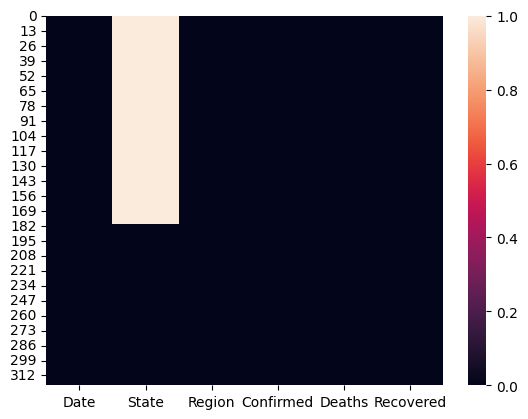

In [30]:
sns.heatmap(data.isnull())
plt.show()

In [83]:
data[~(data.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


###No of confirmed cases,Death and recovery in each region

In [32]:
data.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [40]:
data.groupby('Region').sum().head(10)['Confirmed']

,Confirmed
Region,
Afghanistan,1939
Albania,766
Algeria,3848
Andorra,743
Angola,27
Antigua and Barbuda,24
Argentina,4285
Armenia,1932
Australia,6752


In [42]:
D_conf=data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(n=10)
D_conf


,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
Germany,161539
Turkey,117589
Russia,99399
Iran,93657


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'US'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'France'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Turkey'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Mainland China')])

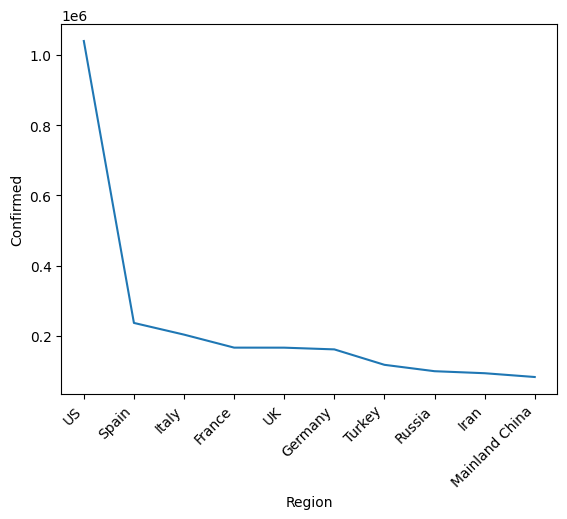

In [63]:
sns.lineplot(D_conf)
plt.xticks(rotation=45, ha='right')

In [51]:
#Confirmed and Recovered
data.groupby('Region')[['Confirmed','Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


###Region with MAXIMUM no of Deaths

In [53]:
data.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [60]:
max_d=data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(n=10)
max_d

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
Germany,161539
Turkey,117589
Russia,99399
Iran,93657


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'US'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'France'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Turkey'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Iran'),
  Text(9, 0, 'Mainland China')])

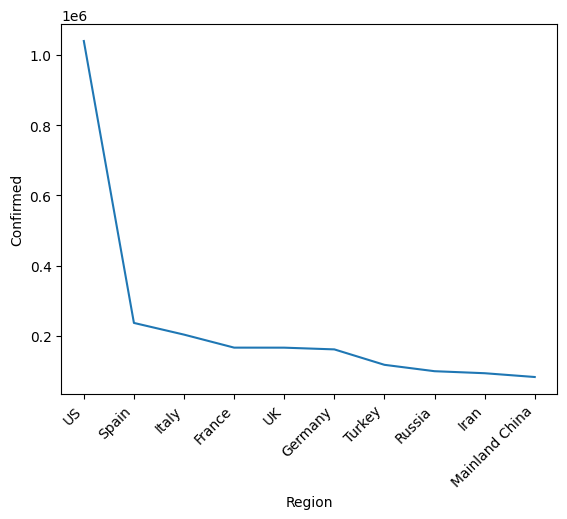

In [62]:
sns.lineplot(max_d)
plt.xticks(rotation=45, ha='right')

###Region with Highest and Lowest no of Deaths

In [69]:
max_D=data.groupby('Region')['Deaths'].sum().sort_values(ascending=False).head(5)
max_D

,Deaths
Region,
US,60967
Italy,27682
UK,26166
Spain,24275
France,24121


([0, 1, 2, 3, 4],
 [Text(0, 0, 'US'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'France')])

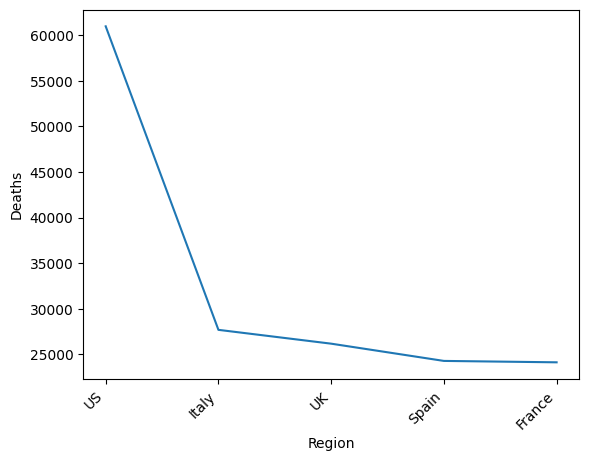

In [85]:
sns.lineplot(max_D)
plt.xticks(rotation=45, ha='right')

Minimun no of deaths by region

In [93]:
data.groupby('Region').Deaths.sum().sort_values(ascending=True).head()


,Deaths
Region,
Laos,0
Mongolia,0
Mozambique,0
Cambodia,0
Fiji,0


###Confirmed Cases in India till April 2020

In [97]:
data[data.Region=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


###Maximum no of Confirmed Case

In [103]:
data.sort_values(by=['Confirmed'],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### Maximum no of recovered Cases

In [104]:
data.sort_values(by=['Recovered'],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0
